Data synthesis

In [8]:
import aerosandbox as asb
import aerosandbox.numpy as np

np.random.seed(0)  # Fix a seed for reproducibility

### Create some data (some fictional system where temperature is a function of time, and we're measuring it)
n = 20

time = 100 * np.random.rand(n)

actual_temperature = 2 * time + 20  # True physics of the system

noise = 10 * np.random.randn(n)
measured_temperature = actual_temperature + noise  # Measured temperature of the system

### Add in a dropout measurement (say, the sensor wire randomly came loose and gave us a 0 reading)
time = np.hstack((time, 90))
measured_temperature = np.hstack((measured_temperature, 0))

In [9]:
def model(x, p):
    return p["m"] * x + p["b"]


fit = asb.FittedModel(
    model=model,
    x_data=time,
    y_data=measured_temperature,
    parameter_guesses={
        "m": 0,
        "b": 0
    },
    verbose=False
)

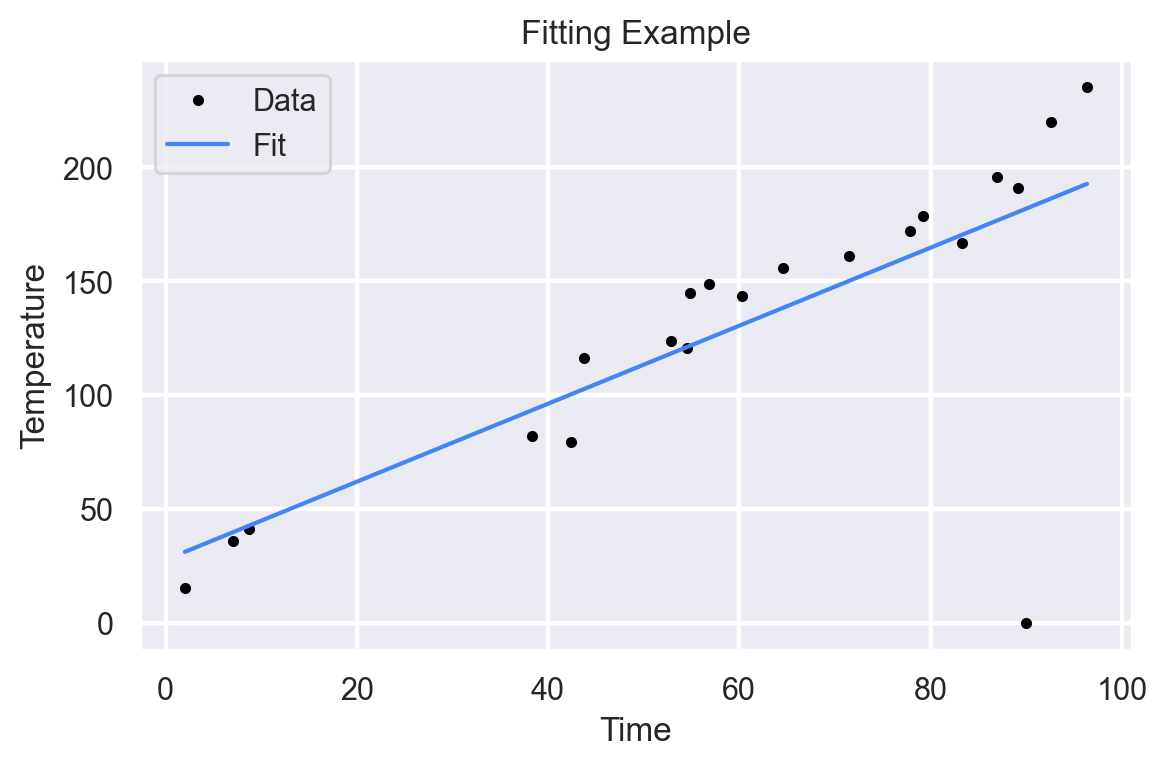

In [13]:
from aerosandbox.tools.pretty_plots import plt, sns, mpl, show_plot

fig, ax = plt.subplots()
plt.plot(time, measured_temperature, ".k", label="Data")
times = np.linspace(time.min(), time.max(), 50)
plt.plot(times, fit(times), "-", label="Fit")
show_plot(
    "Fitting Example",
    "Time",
    "Temperature"
)